# **Setup**

* https://www.himalayandatabase.com/
* https://www.kaggle.com/datasets/raskoshik/himalayan-expeditions
* https://towardsdatascience.com/visualizing-everest-expeditions-43b1ee922a34


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [3]:
Folder_Input = 'Input Data'

In [4]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Data-Visualization\\04 Himalayan Expeditions'

# **Data Import**

## **Data Loading**

In [17]:
import dbfread
dbf = dbfread.DBF(f'{Folder_Input}/exped.DBF',ignore_missing_memofile=True)
df = pd.DataFrame(iter(dbf))

print(df.shape)
df.head()

(11184, 66)


,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,...,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,,,,UK,...,,,,None,None,False,False,None,,2442047
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,,,,Yugoslavia,...,Draslar frostbitten hands and feet,,,None,None,False,False,None,,2445501
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,,,,Japan,...,,,,None,None,False,False,None,,2446797
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,,,,UK,...,,,,None,None,False,False,None,,2448822
4,ANN279301,ANN2,1979,3,1,N Face-W Ridge,NW Ridge of A-IV,,,UK,...,,,,None,None,False,False,None,,2449204


## **Filter Everest Data**

In [24]:
# Filter Data For Everest Expeditions

df = df[df['PEAKID']=='EVER']

print(df.shape)
df.head()

(2306, 66)


,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,...,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
106,EVER88401,EVER,1988,4,1,S Col-SE Ridge,,,,Belgium,...,"Dewaele exhausted, shocked, needed O2 and was ...",,Mountain Travel,True,True,False,False,None,,2449641
108,EVER88402,EVER,1988,4,1,SW Face (Bonington rte),,,,S Korea,...,None,,,False,None,False,False,None,,2449660
382,EVER89306,EVER,1989,3,2,N Col-N Face (Great Couloir),,,,USA,...,None,,None,False,False,False,False,None,,2449938
383,EVER89310,EVER,1989,3,2,N Face (Japanese Couloir),,,,Italy,...,None,,Trekking International,False,None,False,False,None,,2449919
384,EVER89305,EVER,1989,3,2,N Col-N Face (Messner Couloir),,,,Switzerland,...,None,,Sherpa Society,False,False,False,False,None,,2449919


## **Select Relevant Columns**

In [25]:
df.columns

Index(['EXPID', 'PEAKID', 'YEAR', 'SEASON', 'HOST', 'ROUTE1', 'ROUTE2',
       'ROUTE3', 'ROUTE4', 'NATION', 'LEADERS', 'SPONSOR', 'SUCCESS1',
       'SUCCESS2', 'SUCCESS3', 'SUCCESS4', 'ASCENT1', 'ASCENT2', 'ASCENT3',
       'ASCENT4', 'CLAIMED', 'DISPUTED', 'COUNTRIES', 'APPROACH', 'BCDATE',
       'SMTDATE', 'SMTTIME', 'SMTDAYS', 'TOTDAYS', 'TERMDATE', 'TERMREASON',
       'TERMNOTE', 'HIGHPOINT', 'TRAVERSE', 'SKI', 'PARAPENTE', 'CAMPS',
       'ROPE', 'TOTMEMBERS', 'SMTMEMBERS', 'MDEATHS', 'TOTHIRED', 'SMTHIRED',
       'HDEATHS', 'NOHIRED', 'O2USED', 'O2NONE', 'O2CLIMB', 'O2DESCENT',
       'O2SLEEP', 'O2MEDICAL', 'O2TAKEN', 'O2UNKWN', 'OTHERSMTS', 'CAMPSITES',
       'ROUTEMEMO', 'ACCIDENTS', 'ACHIEVMENT', 'AGENCY', 'COMRTE', 'STDRTE',
       'PRIMRTE', 'PRIMMEM', 'PRIMREF', 'PRIMID', 'CHKSUM'],
      dtype='object')

In [27]:
df_final = df.loc[:,['EXPID','PEAKID','YEAR','ROUTE1','ROUTE2','ROUTE3','ROUTE4',
                     'DISPUTED','TERMDATE','TERMREASON','TERMNOTE','HIGHPOINT','CAMPSITES']]

print(df_final.shape)
df_final.head()

(2306, 13)


,EXPID,PEAKID,YEAR,ROUTE1,ROUTE2,ROUTE3,ROUTE4,DISPUTED,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,CAMPSITES
106,EVER88401,EVER,1988,S Col-SE Ridge,,,,False,None,6,Abandoned at 8700m due to bad weather and Sher...,8700,"BC(10/11,5350m),C1(01/12,6050m),C2(03/12,6400m..."
108,EVER88402,EVER,1988,SW Face (Bonington rte),,,,False,1989-01-12,4,Abandoned at 7800m due to wind (no snow in gully),7800,"BC(08/12,5400m),C1(10/12,6000m),C2(14/12,6300m..."
382,EVER89306,EVER,1989,N Col-N Face (Great Couloir),,,,False,1989-10-15,4,Abandoned at 7800m due to wind,7800,"BC(21/08,5200m),ABC(25/08,6400m),C1(28/08,7000..."
383,EVER89310,EVER,1989,N Face (Japanese Couloir),,,,False,1989-10-07,4,Abandoned at 7500m due to bad weather and lack...,7500,"BC(01/09,5200m),ABC(08/09,5600m),C1(11/09,6200..."
384,EVER89305,EVER,1989,N Col-N Face (Messner Couloir),,,,False,1989-10-01,5,Abandoned at 8100m due to deep snow and bad we...,8100,"BC(17/08,5200m),ABC(27/08,6450m),C1(06/09,7800..."


## **Data Exploration**

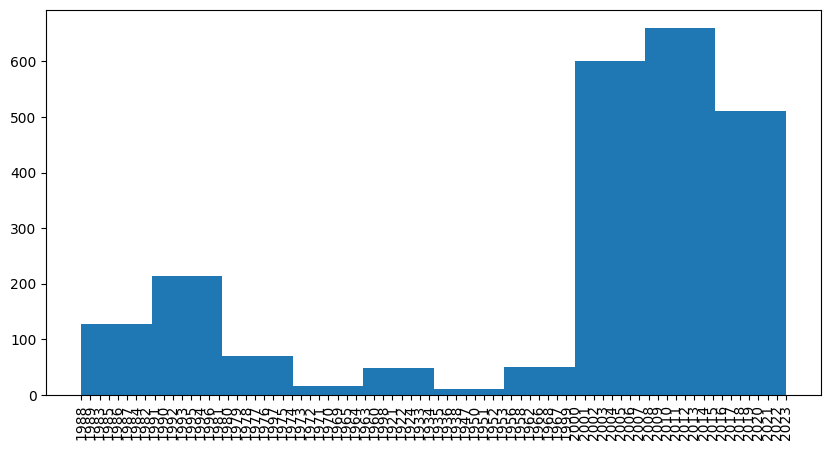

In [38]:
plt.figure(figsize=(10,5))
plt.hist(x=df_final['YEAR'])
plt.xticks(rotation=90)
plt.show()

# **Data Cleaning**

## **Modify Expedition ID**

In [28]:
df['EXPID'] = df['EXPID'] + df['YEAR']

df.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,...,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
106,EVER884011988,EVER,1988,4,1,S Col-SE Ridge,,,,Belgium,...,"Dewaele exhausted, shocked, needed O2 and was ...",,Mountain Travel,True,True,False,False,None,,2449641
108,EVER884021988,EVER,1988,4,1,SW Face (Bonington rte),,,,S Korea,...,None,,,False,None,False,False,None,,2449660
382,EVER893061989,EVER,1989,3,2,N Col-N Face (Great Couloir),,,,USA,...,None,,None,False,False,False,False,None,,2449938
383,EVER893101989,EVER,1989,3,2,N Face (Japanese Couloir),,,,Italy,...,None,,Trekking International,False,None,False,False,None,,2449919
384,EVER893051989,EVER,1989,3,2,N Col-N Face (Messner Couloir),,,,Switzerland,...,None,,Sherpa Society,False,False,False,False,None,,2449919


# **Review TermNote Data**

In [41]:
df_final.columns

Index(['EXPID', 'PEAKID', 'YEAR', 'ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4',
       'DISPUTED', 'TERMDATE', 'TERMREASON', 'TERMNOTE', 'HIGHPOINT',
       'CAMPSITES'],
      dtype='object')

In [44]:
Row_Filter01 = []

for i in df_final.index:
    Term_Note = df_final.loc[i, 'TERMNOTE']

    if len(Term_Note) == 0:  # No Term Note
        Row_Filter01.append(i)


print(len(Row_Filter01))
print(Row_Filter01)

1488
[432, 438, 459, 460, 462, 468, 470, 471, 472, 473, 476, 477, 480, 481, 483, 485, 486, 487, 488, 489, 490, 491, 494, 495, 500, 501, 502, 503, 505, 506, 508, 509, 510, 600, 602, 627, 628, 630, 631, 632, 718, 720, 721, 728, 729, 777, 778, 780, 784, 785, 786, 787, 788, 789, 972, 1094, 1095, 1096, 1098, 1101, 1107, 1108, 1109, 1112, 1182, 1184, 1185, 1186, 1187, 1188, 1189, 1219, 1220, 1221, 1223, 1224, 1225, 1226, 1298, 1299, 1302, 1452, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1485, 1486, 1492, 1493, 1495, 1496, 1497, 1498, 1499, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1543, 1544, 1571, 1630, 1651, 1652, 1700, 1735, 1736, 1737, 1738, 1739, 1740, 1742, 1748, 1752, 1753, 1754, 1755, 1756, 1762, 1766, 1767, 1796, 1850, 1900, 1910, 1913, 1916, 1979, 1983, 2000, 2068, 2101, 2125, 2126, 2165, 2179, 2194, 2195, 2247, 2248, 2251, 2252, 2253, 2257, 2260, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2270, 2271, 2274, 2288, 2320, 2334, 2347, 2453,